In [2]:
# POPULATION ANALYSIS: sex, environment, methylation level  

import numpy as np
import pandas as pd            
import matplotlib.pyplot as plt
import pymc as pm               # type: ignore
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [34]:
data= pd.read_csv( "brown_bear_blood.csv")

# EX2 
# Add a column `age_days` with the exact number of days between `birth` and `sampling_date`. The column should have dtype `int64`.
data.head()

data["age_days"] =(data["age_years"]* 365).astype(int)
data.head()
#data.dtypes 

#data.iloc[3][4]

,Sample_ID,birth,sampling_date,age_years,sex,environment,SLC12A5,POU4F2,VGF,SCGN,age_days
0,210621 Ran,2019/2/1,2021/6/21,2.384124,F,captive,25.935,14.570,3.400,6.003333,870
1,201101 Daichi,2017/2/1,2020/11/1,3.748118,M,captive,28.465,16.680,6.280,6.846667,1368
2,200603 Kai,2016/2/1,2020/6/3,4.334975,M,captive,25.690,16.005,6.040,7.260000,1582
3,200625 Tokuto,2010/2/1,2020/6/25,10.394973,M,captive,42.035,27.805,8.985,9.116667,3794
4,200625 Rocky,2010/2/1,2020/6/25,10.394973,M,captive,42.815,30.785,8.460,8.486667,3794


In [58]:
# Define a function `correct_age` that takes a sex (F or M), an environment (wild or captive) and and age (in days), then it returns an age corrected by a factor (i.e., multiplied by) according to this table.

def correct_age(row) -> int: 
    if row['sex']=="M":
        if row['environment']=="wild":
            return  row["age_days"] *0.8
        else:
            return row["age_days"]
    
    elif row["sex"]== "F":
        if row["environment"] == "wild":
            return row["age_days"]*1.2
        else:
            return  row["age_days"]*1.5
    else:
        raise ValueError("Invalid sex value")

import doctest
doctest.testmod()

#data.loc[2, 'correct_age'] = correct_age(data.loc[2])  #apply to one rows


## Apply the function defined in Exercise 3 on the bears at least 60 days old (at sampling date).
data= data.drop( data.columns[11], axis=1)
data.loc[data['age_days'] > 60, 'correct_age'] = data.loc[data['age_days'] > 60].apply(correct_age, axis=1)

data.head()

,Sample_ID,birth,sampling_date,age_years,sex,environment,SLC12A5,POU4F2,VGF,SCGN,age_days,correct_age
0,210621 Ran,2019/2/1,2021/6/21,2.384124,F,captive,25.935,14.570,3.400,6.003333,870,1305.0
1,201101 Daichi,2017/2/1,2020/11/1,3.748118,M,captive,28.465,16.680,6.280,6.846667,1368,1368.0
2,200603 Kai,2016/2/1,2020/6/3,4.334975,M,captive,25.690,16.005,6.040,7.260000,1582,1582.0
3,200625 Tokuto,2010/2/1,2020/6/25,10.394973,M,captive,42.035,27.805,8.985,9.116667,3794,3794.0
4,200625 Rocky,2010/2/1,2020/6/25,10.394973,M,captive,42.815,30.785,8.460,8.486667,3794,3794.0


In [86]:
#Ex 5
## Each `Sample_ID` is composed by a date and a site name. Print all the unique names of the sites together with the number of samples collected in that site.

###QUESTIONS 

#ASK I GOT NO DUPLICATE OF SAME SITE 
# can we use python documnetations besied the ones inked in the head of the assignment?
#I dont get Doctest, how can i use it?


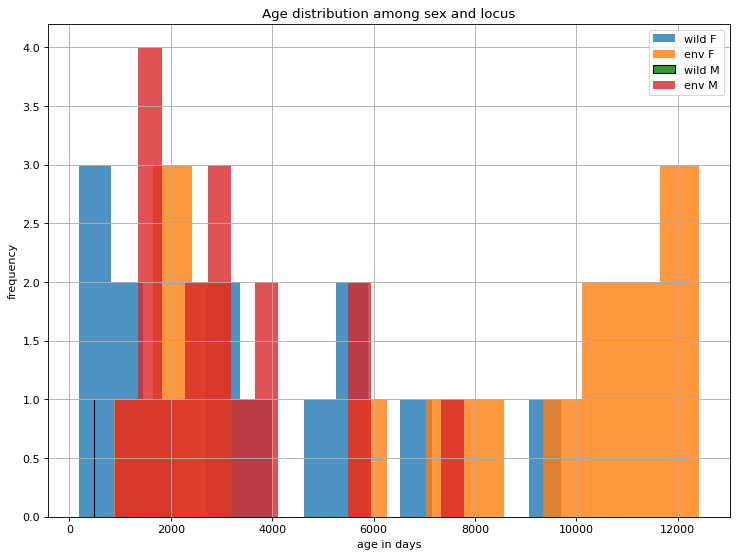

In [134]:
#EX 6 
# Plot together the histograms of `age_days` for each combination of sex and environment. The four histograms should appear within the same axes.
#CLUSTERING  

F_wild = data[(data['sex'] == 'F') & (data['environment'] == 'wild')]
F_environment = data[(data['sex'] == 'F') & (data['environment'] == 'captive')]
M_wild = data[(data['sex'] == 'M') & (data['environment'] == 'wild')]
M_environment = data[(data['sex'] == 'M') & (data['environment'] == 'captive')]

from matplotlib.pyplot import figure
figure(figsize=(11,8), dpi=80)

plt.hist(F_wild["age_days"], label="wild F", alpha=0.8, bins=15)
plt.hist(F_environment["age_days"], label="env F",alpha=0.8, bins=15)
plt.hist(M_wild["age_days"], edgecolor= "black", label="wild M",alpha=1, bins=15)
plt.hist(M_environment["age_days"], label="env M",alpha=0.8 , bins=15)
plt.legend()
plt.ylabel("frequency")
plt.xlabel("age in days")
plt.title("Age distribution among sex and locus")
plt.grid(True)

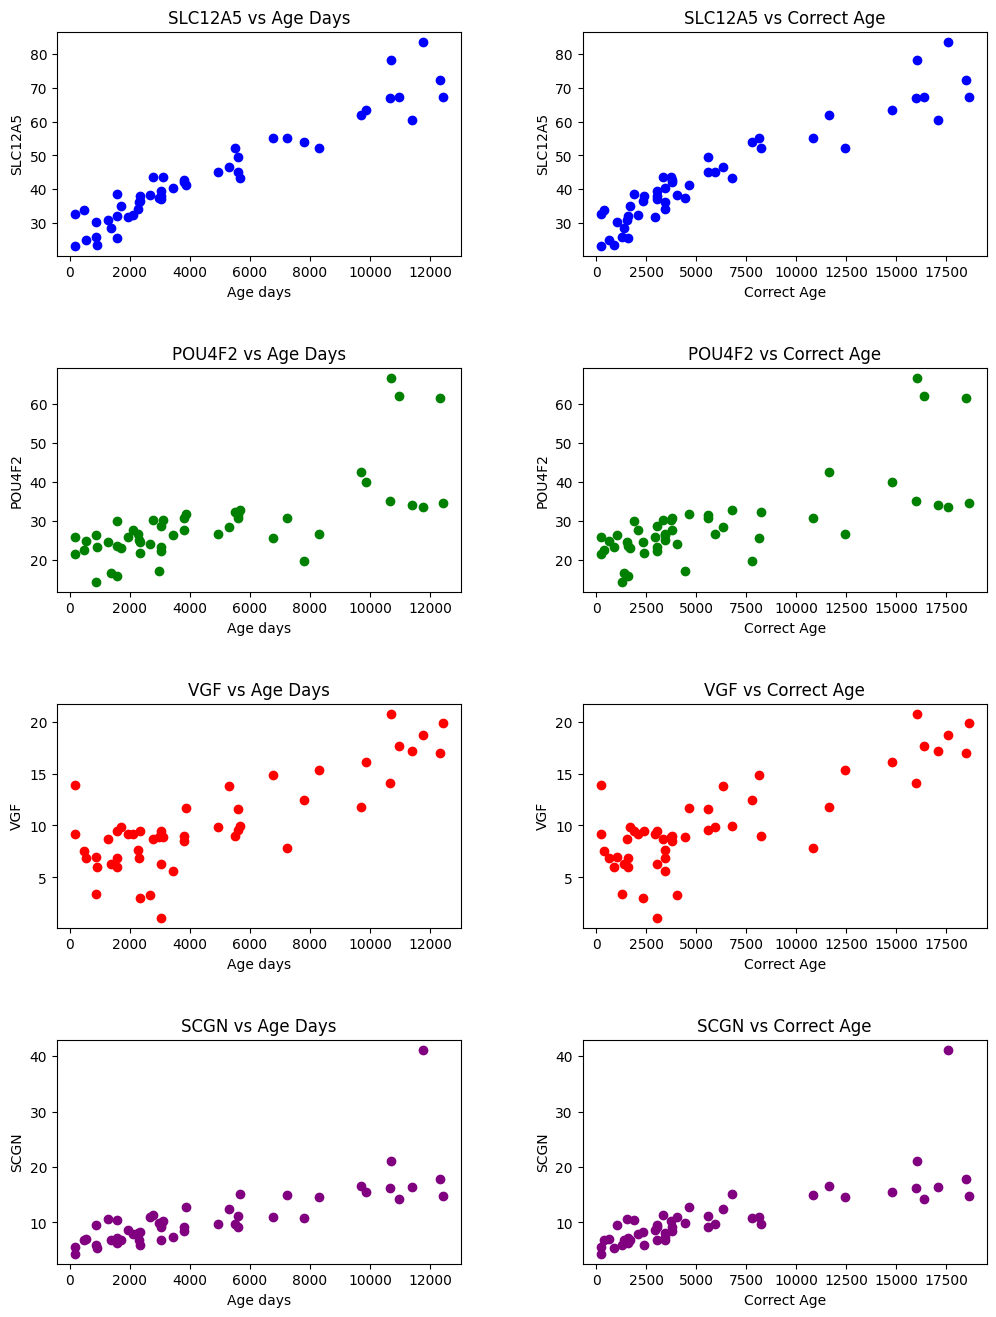

In [143]:
# Make a figure with 2 columns and 4 rows. In the first column put the scatter plots of `age_days` vs. the four methylation levels (`SLC12A5`,`POU4F2`,`VGF`,`SCGN`), 
# in the second column the scatter plots of the ages corrected according to the function defined in Exercise 3 vs. the four methylation levels.

fig, axes = plt.subplots(4, 2, figsize=(12, 16))

methyl = ['SLC12A5','POU4F2','VGF','SCGN']
colors = ['blue', 'green', 'red', 'purple']

for i, meth in enumerate(methyl):
    axes[i, 0].scatter(data['age_days'], data[meth], color=colors[i])
    axes[i, 0].set_xlabel('Age days')
    axes[i, 0].set_ylabel(meth)
    axes[i, 0].set_title(f'{meth} vs Age Days')

for i, meth in enumerate(methyl):
    axes[i, 1].scatter(data['correct_age'], data[meth], color=colors[i])
    axes[i, 1].set_xlabel('Correct Age')
    axes[i, 1].set_ylabel(meth)
    axes[i, 1].set_title(f'{meth} vs Correct Age')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


In [ ]:
#MonteCarlog